# Exercise set 3

In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import norm, splu, spsolve
import matplotlib.pyplot as plt
from matplotlib import cm 
import time

### Ex 1

In [2]:
### a
def fdm2d(n: int, a_x = -1.0, a_y = -1.0, b_x = 0.0, b_y = 0.0, c = 0.0) -> (sparse.csc_matrix, np.array): 
    h = 1.0/(n+1)
    Dx = sparse.diags([a_x - h*b_x/2, -2*a_x+h*h*c/2.0, a_x + h*b_x/2], offsets=[-1, 0, 1], shape=(n,n))
    Dy = sparse.diags([a_y - h*b_y/2, -2*a_y+h*h*c/2.0, a_y + h*b_y/2], offsets=[-1, 0, 1], shape=(n,n))
    Id = sparse.eye(n,n); 
    A = sparse.kron(Id, Dx) + sparse.kron(Dy, Id)
    [X, Y] = np.meshgrid(np.arange(1, n+1) * h, np.arange(1, n+1) * h) 
    b = h**2 * np.reshape(X - Y, (n**2, 1))
    return A, b

A,b=fdm2d(5,-1.0,-1.0,3.0,-4.0,1.0); print(type(A)) # -> <class ’scipy.sparse.bsr.bsr_matrix’> 

print(f"A: {A.toarray()}")
print(f"b: {b}")

<class 'scipy.sparse.bsr.bsr_matrix'>
A: [[ 4.02777778 -0.75        0.          0.          0.         -1.33333333
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-1.25        4.02777778 -0.75        0.          0.          0.
  -1.33333333  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.         -1.25        4.02777778 -0.75        0.          0.
   0.         -1.33333333  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.         -1.25        4.02777778 -0.75        0.
   0.          0.         -1.33333333  0.       

In [3]:
### b
n_list = [32, 128]

for n in n_list:
    print(f"n={n}:")
    A, b = fdm2d(n,-1.0,-1.0,3.0,-4.0,1.0);
    u = spsolve(A,b); 
    print(u)



n=32:
[-7.44376872e-05 -1.27534162e-04 -1.58497569e-04 ... -2.14345951e-04
 -1.25973818e-04 -5.32917912e-05]
n=128:
[-4.95163328e-06 -9.54832244e-06 -1.37834340e-05 ... -1.14810491e-05
 -7.30157876e-06 -3.46763039e-06]


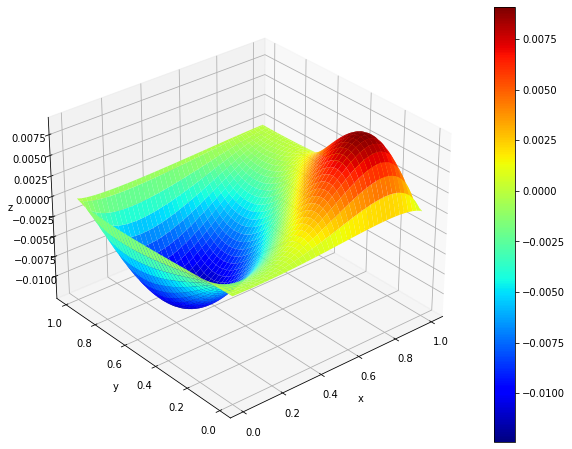

In [4]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

h = 1.0/(n+1)
[X, Y] = np.meshgrid(np.arange(1, n+1) * h, np.arange(1, n+1) * h) 

surf = ax.plot_surface(X, Y, np.reshape(u, (n, n)), cmap=cm.jet)

fig.colorbar(surf)
ax.azim = 230 # Change the camera angle so it is the same as in the matlab example
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

### Ex 2

In [5]:
### a
A = sparse.csc_matrix(np.array( [[8,0,0,0,0,0],[0,4,5,6, 0,7],[0,0,1,0,2,0],
[7,0,1,6,4,6],[0,0,4,0,11,0],[7,0,0,3,3,8]] ))
A.toarray()

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  4,  5,  6,  0,  7],
       [ 0,  0,  1,  0,  2,  0],
       [ 7,  0,  1,  6,  4,  6],
       [ 0,  0,  4,  0, 11,  0],
       [ 7,  0,  0,  3,  3,  8]], dtype=int64)

In [6]:
# step 1
# d = 8
# l = [0, 0, 0, 7, 0, 7]
# u = [0, 0, 0, 0, 0, 0]
A_1 = A.copy()
A_1.toarray()

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  4,  5,  6,  0,  7],
       [ 0,  0,  1,  0,  2,  0],
       [ 7,  0,  1,  6,  4,  6],
       [ 0,  0,  4,  0, 11,  0],
       [ 7,  0,  0,  3,  3,  8]], dtype=int64)

In [7]:
# step 2
# d = 3
# l = [0, 0, 0, 0]
# u = [5, 6, 0, 7]
A_2 = A.copy()
A_2.toarray()

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  4,  5,  6,  0,  7],
       [ 0,  0,  1,  0,  2,  0],
       [ 7,  0,  1,  6,  4,  6],
       [ 0,  0,  4,  0, 11,  0],
       [ 7,  0,  0,  3,  3,  8]], dtype=int64)

In [8]:
# step 3
# d = 1
# l = [1, 4, 0]
# u = [0, 2, 0]
A_3 = sparse.csc_matrix(
                np.array( [[8, 0, 0, 0, 0, 0],
                           [0, 4, 5, 6, 0, 7],
                           [0, 0, 1, 0, 2, 0],
                           [7, 0, 1, 6, 2, 6],
                           [0, 0, 4, 0, 3, 0],
                           [7, 0, 0, 3, 3, 8]]))
A_3.toarray()

array([[8, 0, 0, 0, 0, 0],
       [0, 4, 5, 6, 0, 7],
       [0, 0, 1, 0, 2, 0],
       [7, 0, 1, 6, 2, 6],
       [0, 0, 4, 0, 3, 0],
       [7, 0, 0, 3, 3, 8]], dtype=int64)

In [9]:
# step 4
# d = 6
# l = [0, 3]
# u = [2, 6]
A_4 = sparse.csc_matrix(
                np.array( [[8, 0, 0, 0, 0, 0],
                           [0, 4, 5, 6, 0, 7],
                           [0, 0, 1, 0, 2, 0],
                           [7, 0, 1, 6, 2, 6],
                           [0, 0, 4, 0, 3, 0],
                           [7, 0, 0, 3, 2, 5]]))
A_4.toarray()

array([[8, 0, 0, 0, 0, 0],
       [0, 4, 5, 6, 0, 7],
       [0, 0, 1, 0, 2, 0],
       [7, 0, 1, 6, 2, 6],
       [0, 0, 4, 0, 3, 0],
       [7, 0, 0, 3, 2, 5]], dtype=int64)

In [10]:
# step 4
# d = 3
# l = 2
# u = 0
A_5 = A_4.copy()
A_5.toarray()

array([[8, 0, 0, 0, 0, 0],
       [0, 4, 5, 6, 0, 7],
       [0, 0, 1, 0, 2, 0],
       [7, 0, 1, 6, 2, 6],
       [0, 0, 4, 0, 3, 0],
       [7, 0, 0, 3, 2, 5]], dtype=int64)

In [11]:
LDU = A_5.copy()
L = sparse.tril(LDU, k=-1)
print(f"L: \n{L.toarray()}")
D = np.diag(LDU.diagonal())
print(f"D: \n{D}")
U = sparse.triu(LDU, k=1)
print(f"L: \n{U.toarray()}")

L: 
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [7 0 1 0 0 0]
 [0 0 4 0 0 0]
 [7 0 0 3 2 0]]
D: 
[[8 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 5]]
L: 
[[0 0 0 0 0 0]
 [0 0 5 6 0 7]
 [0 0 0 0 2 0]
 [0 0 0 0 2 6]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [17]:
def diag_inverse(D):
    return np.diag(1 / np.diag(D))

LDU = (L + D) @ diag_inverse(D) @ (D + U)

print(f"(L+D) D^(-1) (D+U): \n {LDU}")

print(f"LDU factorization equal to A: {np.all(LDU == A)}")

(L+D) D^(-1) (D+U): 
 [[ 8.  0.  0.  0.  0.  0.]
 [ 0.  4.  5.  6.  0.  7.]
 [ 0.  0.  1.  0.  2.  0.]
 [ 7.  0.  1.  6.  4.  6.]
 [ 0.  0.  4.  0. 11.  0.]
 [ 7.  0.  0.  3.  3.  8.]]
LDU factorization equal to A: True


In [19]:
def ldu(A):
    A_ = A.copy()
    for k in range(1, len(A)):
        A_[k:, k:] = A_[k:, k:] - (1/A_[k-1, k-1]) * (np.reshape(A_[k:, k-1], (len(A_)-k, 1)) @ np.reshape(A_[k-1, k:], (1, len(A_) - k)))
    return A_

In [23]:
### b
k = 6
n_list = 2 ** np.arange(2, k+1)

running_times = []
fillin = []
for n in n_list:
    print(f"n = {n}")
    A, _ = fdm2d(n,-1.0,-1.0,3.0,-4.0,1.0)
    
    start_time = time.time()
    LDU = ldu(A.toarray())
    run_time = time.time() - start_time
    running_times.append(run_time)
    print(f"run time: {run_time:.8f} s")
    
    fill_in_ratio = len(np.nonzero(L+D+U)[0]) / len(np.nonzero(A.toarray())[0])
    fillin.append(fill_in_ratio)
    print(f"fill in ratio: {fill_in_ratio:.8f}")
    print("---")
print("n=128 takes too long, so it is not included in the results")

n = 4
run time: 0.00144887 s
fill in ratio: 0.28125000
---
n = 8
run time: 0.00191998 s
fill in ratio: 0.06250000
---
n = 16
run time: 0.03602600 s
fill in ratio: 0.01480263
---
n = 32
run time: 2.01942205 s
fill in ratio: 0.00360577
---
n = 64
run time: 175.97887325 s
fill in ratio: 0.00089003
---
n=128 takes too long, so it is not included in the results


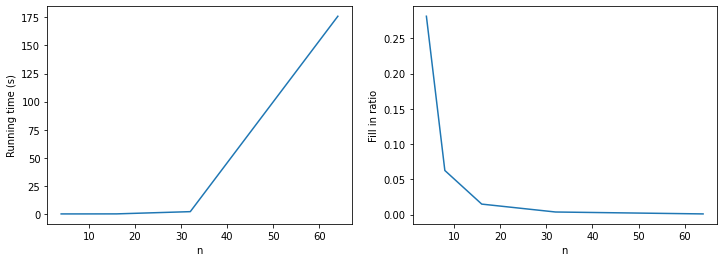

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(12,4))
ax1.plot(n_list, running_times)
ax1.set_xlabel("n")
ax1.set_ylabel("Running time (s)")

ax2.plot(n_list, fillin)
ax2.set_xlabel("n")
ax2.set_ylabel("Fill in ratio");

In [39]:
### c

In [55]:
# scipy splu() returns L, U, perm_c, perm_r s.t. perm_r*A*perm_c = L*U # (see scipy.sparse.linalg.SuperLU)
# perm_r and perm_c are used by default
# deactivate use of perm_c with permc_spec="Natural" and
# deactivate the use of perm_r with the use of diag_pivot_thresh=0, # options={"SymmetricMode": True}
def lu2ldu(A):
    A = sparse.csc_matrix(A)
    lu = splu(A, permc_spec="Natural", diag_pivot_thresh=0,options={"SymmetricMode": True}) # investigate numerical round-off
    L = sparse.csc_matrix.copy(lu.L)
    U = sparse.csc_matrix.copy(lu.U)
    D = sparse.diags(sparse.csc_matrix.diagonal(U), 0,shape=(np.size(A, 0), np.size(A, 1))) 
    U = sparse.triu(U, +1)
    L = sparse.tril(L * D, -1) 
    LDUh = L + D + U
    return LDUh

In [56]:
A, b = fdm2d(4,-1.0,-1.0,3.0,-4.0,1.0)
LDUh = lu2ldu(A)

In [70]:
L = sparse.tril(LDUh,-1);
U = sparse.triu(LDUh,+1);
D = sparse.spdiags(sparse.csc_matrix.diagonal(LDUh),[0],np.size(LDUh,0),np.size(LDUh,1)); # solve Au = b <==> u = (D+U)\inv * D * (L+D)\inv b
u = spsolve(D+U,D*spsolve(L+D,b));
print(np.linalg.norm(A*u-b,2))

3.457781232003916e-17


In [62]:
np.diag(D.toarray())

array([4.04      , 3.81475248, 3.80145241, 3.80061781, 3.8189833 ,
       3.53831774, 3.513131  , 3.52645143, 3.80180021, 3.5059741 ,
       3.47589615, 3.49685541, 3.79978418, 3.50073683, 3.46938336,
       3.49242658])

In [63]:
def fdm1d(n: int, a_x = -1.0, b_x = 0.0, c = 0.0) -> (sparse.csc_matrix, np.array):
    h = 1.0/(n+1)
    Dx = sparse.diags([a_x - h*b_x/2, -2*a_x+h*h*c/2.0, a_x + h*b_x/2], offsets=[-1, 0, 1], shape=(n,n)) 
    A = Dx;
    X = np.mgrid[1:n+1]/(n+1)
    b = h*h*X # row vector (only 1 dimension)!
    return A, b

In [64]:
A, b = fdm1d(32)


In [65]:
LDUh = lu2ldu(A)

In [66]:
LDU = ldu(A.toarray())

In [67]:
np.nonzero(LDU != LDUh.toarray())

(array([29, 31]), array([28, 30]))

In [68]:
LDUh.shape

(32, 32)

In [69]:
LDU.shape

(32, 32)

### Ex 3

In [104]:
nv = 8
na = 15

random_incidences = np.random.randint(1, nv+1, (na, 2))
random_incidences
pos_ones = random_incidences[:,0]
neg_ones = random_incidences[:,1]
pos_ones, neg_ones

(array([2, 2, 1, 6, 1, 3, 8, 3, 5, 1, 2, 8, 6, 7, 5]),
 array([4, 1, 7, 3, 1, 8, 6, 3, 1, 6, 7, 1, 4, 7, 2]))

In [105]:
sparse.random(nv, na, density=0.3, data_rvs=np.ones).A

# in elke kolom +1 en -1 ???

array([[0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.]])

### Ex 4

a. Eigenvalues $\lambda$ of matrix $A$ can be obtained by solving the equation $$A \cdot \vec{x} = \lambda \cdot \vec{x},$$ equal to $$(A-\lambda I)\cdot \vec{x}=0$$ with $I$ the identity matrix. This equation can be solved by setting the determinant of $A-\lambda I$ to zero and solving for $\lambda$.
$$\det(A_1-\lambda I)=\det\left( \begin{matrix} 2-\lambda & -1 & 0 \\ -1 & 2-\lambda & -1 \\ 0 & -1 & 2-\lambda \end{matrix} \right)=0$$
$$(2-\lambda) \det \left( \begin{matrix} 2-\lambda & -1 \\ -1 & 2-\lambda \end{matrix} \right) + \det \left( \begin{matrix} -1 & -1 \\ 0 & 2-\lambda \end{matrix} \right)=0$$
$$(2-\lambda)((2-\lambda)^2-1)-(2-\lambda)=0$$
$$(2-\lambda)((2-\lambda)^2-2)=0$$
$$\lambda=2 \vee (2-\lambda)^2=2$$
$$\lambda_1=2, \lambda_2=2-\sqrt{2}, \lambda_3=2+\sqrt{2}$$

Eigenvectors $\vec{x}_i$ now can be obtained by solving $(A-\lambda_i I)\cdot \vec{x}_i=0$ for every $\lambda_i$. Let $\vec{x}_2=[v_1; v_2; v_3]$, then $(A-\lambda_2 I)\cdot \vec{x}_2$ is 

$$\left( \begin{matrix} 2-(2-\sqrt{2}) & -1 & 0 \\ -1 & 2-(2-\sqrt{2}) & -1 \\ 0 & -1 & 2-(2-\sqrt{2})\end{matrix} \right) \left( \begin{matrix} v_1 \\ v_2 \\ v_3 \end{matrix} \right)=0$$
$$\left( \begin{matrix} \sqrt{2} & -1 & 0 \\ -1 & \sqrt{2} & -1 \\ 0 & -1 & \sqrt{2}\end{matrix} \right) \left( \begin{matrix} v_1 \\ v_2 \\ v_3 \end{matrix} \right)=0$$
$$\left( \begin{matrix} \sqrt{2} v_1 - v_2\\ -v_1 + \sqrt{2} v_2 - v_3 \\ -v_2 + \sqrt{2} v_3 \end{matrix} \right)=0$$
Solving this system of equation with $v_2=\sqrt{2} v_1$, such that $-v_1+\sqrt{2}\sqrt{2}v_1-v_3=0$. Resulting in $v_1=v_3$. Setting $v_1$ equal to $a$, we get the vector $a \cdot \left( \begin{matrix} 1 \\ \sqrt{2} \\ 1\end{matrix} \right)$. Normalizing gives us $\vec{x}_2=\left( \begin{matrix} 1/2 \\ \sqrt{2}/2 \\ 1/2\end{matrix} \right)$.
The other two eigenvectors can be computed in the same way resulting in $\vec{x}_1=\left( \begin{matrix} \sqrt{2}/2 \\ 0 \\ -\sqrt{2}/2 \end{matrix} \right)$ and $\vec{x}_3=\left( \begin{matrix} -1/2 \\ \sqrt{2}/2 \\ -1/2\end{matrix} \right)$


The calculation for $A_2$ is exactly the same when substituting $2-\lambda$ for $4-\lambda$ resulting in $\lambda_1=4, \lambda_2=4-\sqrt{2}, \lambda_3=4+\sqrt{2}$ and eigenvectors

$\vec{x}_1=\left( \begin{matrix} \sqrt{2}/2 \\ 0 \\ -\sqrt{2}/2 \end{matrix} \right)$, $\vec{x}_2=\left( \begin{matrix} 1/2 \\ \sqrt{2}/2 \\ 1/2\end{matrix} \right)$ and $\vec{x}_3=\left( \begin{matrix} 1/2 \\ -\sqrt{2}/2 \\ 1/2\end{matrix} \right)$

In [109]:
# check for correctness
# A_1 = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
# A_2 = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]])
# np.linalg.eig(A_1)
# np.linalg.eig(A_2)

In [72]:
### b
ops_per_sec = 10**8
n_max = np.power(ops_per_sec * 3600, 1/3)
print(f"Largest n for which all eigenpairs can be computed in less than one hour: \n \
    {np.ceil(n_max).astype(int)}")

Largest n for which all eigenpairs can be computed in less than one hour: 
     7114


In [73]:
### c
n_ops = np.power(8*10**9, 3/2)
print(f"Computation of all eigenpairs for the largest full matrix takes: \n \
        {n_ops / ops_per_sec / 3600 / 24 :.4f} days")

Computation of all eigenpairs for the largest full matrix takes: 
         82.8173 days


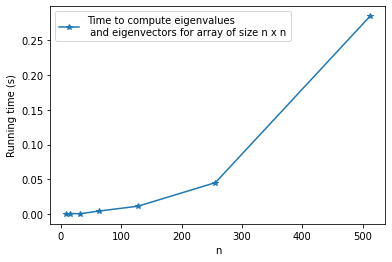

In [74]:
### d
n_list = [8,16,32,64,128,256,512]
running_times = []

for n in n_list:
    A, b = fdm1d(n)
    
    start_time = time.time()
    eigenvalues, eigenvectors = np.linalg.eig(A.toarray())
    run_time = time.time() - start_time
    
    running_times.append(run_time)
    
plt.plot(n_list, running_times, '*-', label='Time to compute eigenvalues \n and eigenvectors for array of size n x n')
plt.xlabel("n")
plt.ylabel("Running time (s)");
plt.legend()

In [184]:
from scipy.io import loadmat
import pandas as pd